In [1]:
#Superstore.xls
#airline_passengers.csv
#DailyTotalFemaleBirths.csv
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#seasonal data
df = pd.read_csv("airline_passengers.csv",index_col="Month",parse_dates=True)
#parse means - day,month,year separated
df.index.freq = 'MS'
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [42]:
df["Thousands of Passengers"]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Thousands of Passengers, Length: 144, dtype: int64

In [3]:
#non-seasonal data
df1 = pd.read_csv("DailyTotalFemaleBirths.csv",index_col="Date",parse_dates=True)
df1.index.freq = 'D'
df1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [4]:
from statsmodels.tsa.stattools import ccovf, ccf
from statsmodels.tsa.stattools import adfuller, kpss, coint, bds, q_stat, grangercausalitytests, levinson_durbin
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [5]:
from scipy.signal import periodogram

In [6]:
#Augmented Dickey Fuller Test
#plot data with 12 month rolling mean (simple moving average) and std

df['12-month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()
df['12-month-SMA']


Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Freq: MS, Name: 12-month-SMA, Length: 144, dtype: float64

In [7]:
df['12-month-Std'] = df['Thousands of Passengers'].rolling(window=12).std()
df.tail()

,Thousands of Passengers,12-month-SMA,12-month-Std
Month,,,
1960-08-01,606,463.333333,83.630500
1960-09-01,508,467.083333,84.617276
1960-10-01,461,471.583333,82.541954
1960-11-01,390,473.916667,79.502382
1960-12-01,432,476.166667,77.737125


<AxesSubplot:xlabel='Month'>

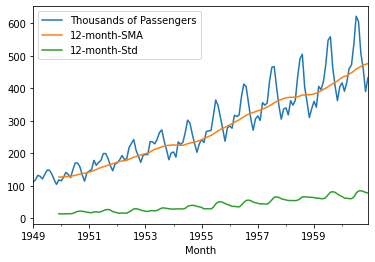

In [8]:
df[['Thousands of Passengers','12-month-SMA','12-month-Std']].plot()

In [9]:
df1["Births"]

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Freq: D, Name: Births, Length: 365, dtype: int64

In [10]:
print("Augmented Dickey Fuller Test on Air line data")
dftest = adfuller(df['Thousands of Passengers'],autolag='AIC')
dftest

Augmented Dickey Fuller Test on Air line data


(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [11]:
print("Augmented Dickey Fuller Test on Air line data")
dfout = pd.Series(dftest[0:4] ,index=["ADF test stats","p-value","#Lags used","#obs used"])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val
    # f means critical value of f-distribution
print(dfout)


Augmented Dickey Fuller Test on Air line data
ADF test stats            0.815369
p-value                   0.991880
#Lags used               13.000000
#obs used               130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [12]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

<AxesSubplot:xlabel='Date'>

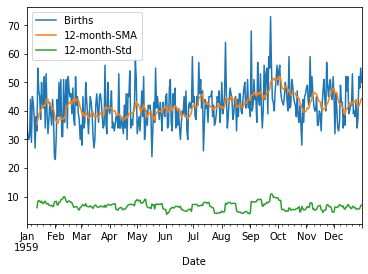

In [13]:
df1['12-month-SMA'] = df1['Births'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Births'].rolling(window=12).std()
df1[['Births','12-month-SMA','12-month-Std']].plot()

In [14]:
df1.columns

Index(['Births', '12-month-SMA', '12-month-Std'], dtype='object')

In [15]:
print("Augmented Dickey Fuller Test on Daliy Female birth data")
df1test = adfuller(df1['Births'],autolag='AIC')
df1test

Augmented Dickey Fuller Test on Daliy Female birth data


(-4.808291253559763,
 5.243412990149865e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [16]:
print("Augmented Dickey Fuller Test on Daliy Female birth data")
df1out = pd.Series(df1test[0:4] ,index=["ADF test stats","p-value","#Lags used","#obs used"])

for key,val in df1test[4].items():
    df1out[f'critical value ({key})'] = val
    # f means critical value of f-distribution
print(df1out)

Augmented Dickey Fuller Test on Daliy Female birth data
ADF test stats           -4.808291
p-value                   0.000052
#Lags used                6.000000
#obs used               358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


In [17]:
#Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests

In [18]:
#import lib
import pandas as pd
import numpy as np
%matplotlib inline

#load data
df = pd.read_csv("airline_passengers.csv",index_col="Month",parse_dates=True)
df.index.freq = 'MS'
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [19]:
#train and test split

train_data = df.iloc[:109] # 0 to 108
test_data = df.iloc[108:]

In [20]:
#fitting the model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# mul - seasonality factor either add , multiplication

model_fit=ExponentialSmoothing(train_data['Thousands of Passengers'],
                          trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\Test\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [21]:
test_predictions = model_fit.forecast(36).rename('HW Forecast')

<AxesSubplot:xlabel='Month'>

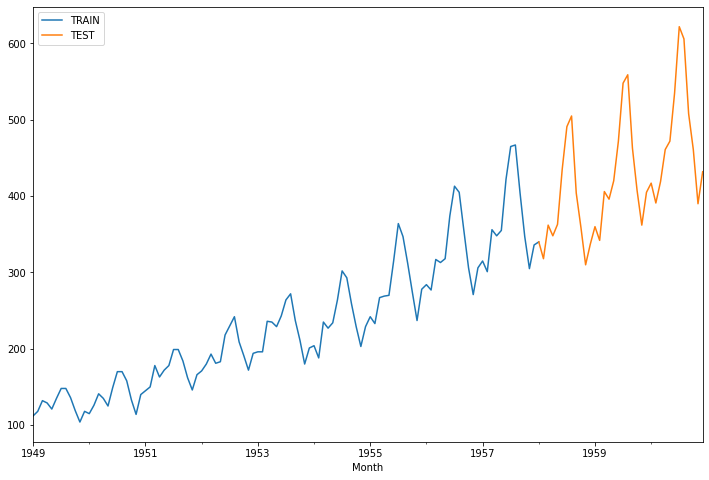

In [22]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

<AxesSubplot:xlabel='Month'>

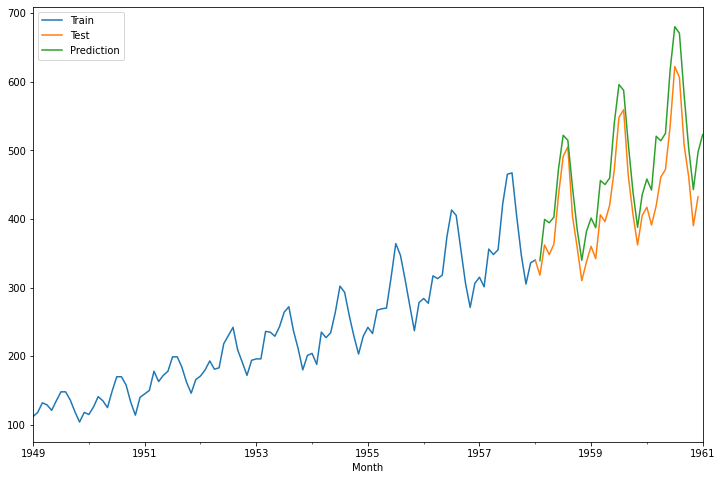

In [23]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train')
test_data['Thousands of Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_predictions.plot(legend=True,label='Prediction')

<AxesSubplot:xlabel='Month'>

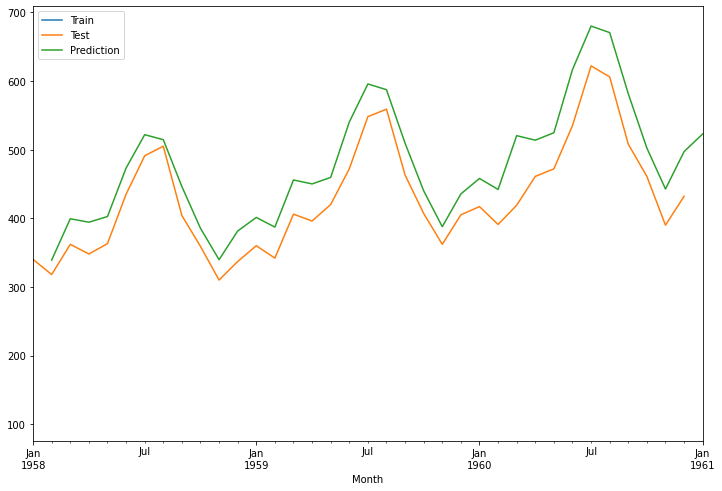

In [24]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train')
test_data['Thousands of Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_predictions.plot(legend=True,label='Prediction',xlim=['1958-01-01','1961-01-01'])

In [25]:
#Evaluation
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [26]:
mean_absolute_error(test_data,test_predictions)

63.03104082299123

In [27]:
mean_squared_error(test_data,test_predictions)

5614.236501157957

In [28]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92820898138402

In [29]:
new_train_data = df.iloc[:128] #increased from 108 to 128 - 20 points increased
new_test_data = df.iloc[128:]

In [30]:
len(new_test_data)

16

In [31]:
model_fit=ExponentialSmoothing(new_train_data['Thousands of Passengers'],
                          trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\Test\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [32]:
test_predictions = model_fit.forecast(16).rename('HW Forecast')
test_predictions , new_test_data

(1959-09-01    450.516419
 1959-10-01    398.936635
 1959-11-01    346.237472
 1959-12-01    381.301071
 1960-01-01    404.575237
 1960-02-01    383.319133
 1960-03-01    451.340929
 1960-04-01    439.288443
 1960-05-01    463.661578
 1960-06-01    532.307789
 1960-07-01    617.282924
 1960-08-01    622.313327
 1960-09-01    505.249456
 1960-10-01    447.403268
 1960-11-01    388.301706
 1960-12-01    427.625167
 Freq: MS, Name: HW Forecast, dtype: float64,
             Thousands of Passengers
 Month                              
 1959-09-01                      463
 1959-10-01                      407
 1959-11-01                      362
 1959-12-01                      405
 1960-01-01                      417
 1960-02-01                      391
 1960-03-01                      419
 1960-04-01                      461
 1960-05-01                      472
 1960-06-01                      535
 1960-07-01                      622
 1960-08-01                      606
 1960-09-01         

<AxesSubplot:xlabel='Month'>

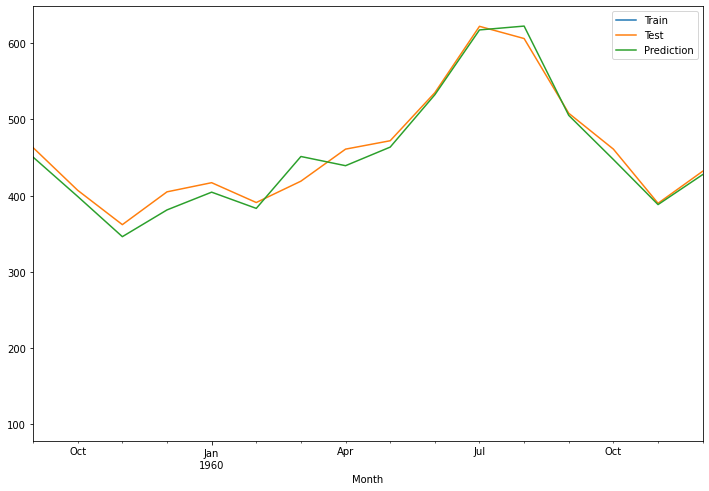

In [33]:
new_train_data['Thousands of Passengers'].plot(legend=True,label='Train')
new_test_data['Thousands of Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_predictions.plot(legend=True,label='Prediction',xlim=['1959-09-01','1960-12-01'])

In [34]:
mean_absolute_error(new_test_data,test_predictions)

11.790497449401617

In [35]:
mean_squared_error(new_test_data,test_predictions)

208.82904757008902

<AxesSubplot:xlabel='Month'>

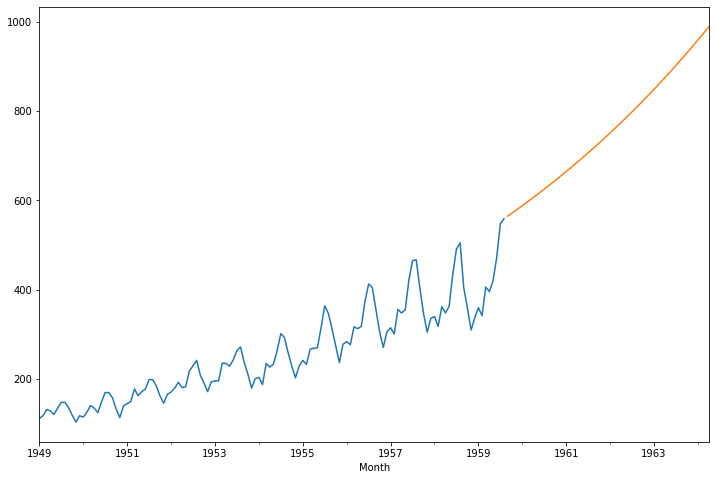

In [36]:
final_model=ExponentialSmoothing(new_train_data['Thousands of Passengers'], trend='mul', seasonal_periods=12).fit()
forecast_predictions = final_model.forecast(56)
new_train_data['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [37]:
#ts is stationary if it doesnt exhibit trend and seasonality
sample = pd.read_csv("samples.csv",index_col=0,parse_dates=True)
sample

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


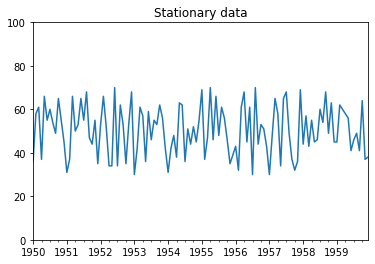

In [38]:
sample['a'].plot(ylim=[0,100],title="Stationary data").autoscale(axis='x',tight=True)

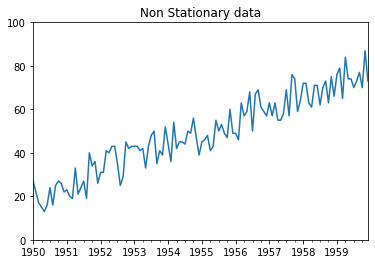

In [39]:
sample['b'].plot(ylim=[0,100],title="Non Stationary data").autoscale(axis='x',tight=True)

In [40]:
#convert to stationary : Differencing
#